ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

---

**Dataset:** Heart Failure Clinical Records (`waleed.csv`)  
This dataset contains medical records of patients with heart failure. The target variable `DEATH_EVENT` indicates whether a patient died during the follow-up period.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset

df = pd.read_csv("waleed.csv")

# Display first 5 rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                     False     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                     False     False              False   
296  False    False                     False     False              False   
297  False    False                     False     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_so

In [4]:
print(df.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### Check Duplicate Rows

In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of Rows and Columns

In [6]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (299, 13) 

number of rows:  299
number of columns:  13


### Data Type of Columns

In [7]:
# viewing the data types of columns
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
# All columns are already numeric — no type conversion needed
# Convert binary/categorical columns to integer type for clarity
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df[binary_cols] = df[binary_cols].astype(int)

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Descriptive Summary Statistics

In [9]:
# Statistical summary
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Univariate Analysis

We examine the distribution of each numerical feature.

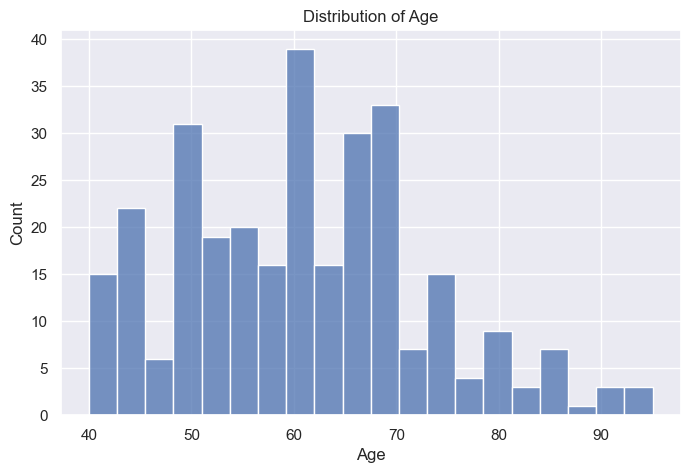

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

- Shows the age distribution of patients in the dataset
- Older patients tend to be more represented, reflecting the prevalence of heart failure in older populations

### Distribution of Ejection Fraction

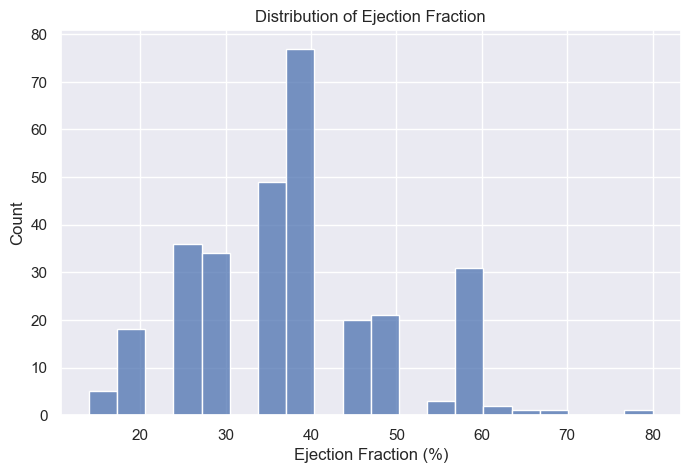

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['ejection_fraction'], bins=20)
plt.title("Distribution of Ejection Fraction")
plt.xlabel("Ejection Fraction (%)")
plt.show()

## Bivariate Analysis

### Death Event by Sex

Comparing death rate between male (1) and female (0) patients.

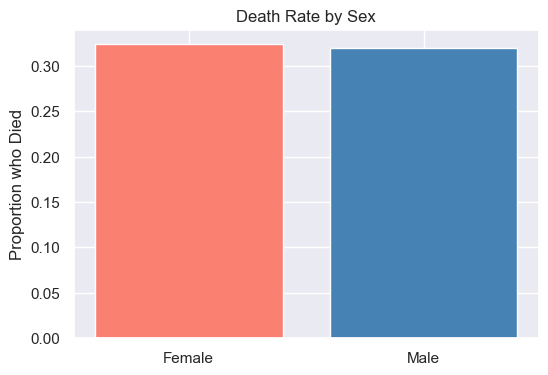

,sex,DEATH_EVENT
0,Female,0.323810
1,Male,0.319588


In [12]:
death_by_sex = df.groupby('sex')['DEATH_EVENT'].mean().reset_index()
death_by_sex['sex'] = death_by_sex['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(6,4))
plt.bar(death_by_sex['sex'], death_by_sex['DEATH_EVENT'], color=['salmon', 'steelblue'])
plt.title("Death Rate by Sex")
plt.ylabel("Proportion who Died")
plt.show()

death_by_sex

### Death Event by Anaemia

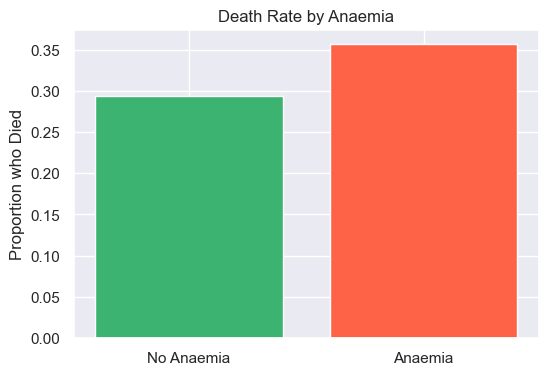

,anaemia,DEATH_EVENT
0,No Anaemia,0.294118
1,Anaemia,0.356589


In [13]:
death_by_anaemia = df.groupby('anaemia')['DEATH_EVENT'].mean().reset_index()
death_by_anaemia['anaemia'] = death_by_anaemia['anaemia'].map({0: 'No Anaemia', 1: 'Anaemia'})

plt.figure(figsize=(6,4))
plt.bar(death_by_anaemia['anaemia'], death_by_anaemia['DEATH_EVENT'], color=['mediumseagreen', 'tomato'])
plt.title("Death Rate by Anaemia")
plt.ylabel("Proportion who Died")
plt.show()

death_by_anaemia

### Age vs Serum Creatinine Relationship

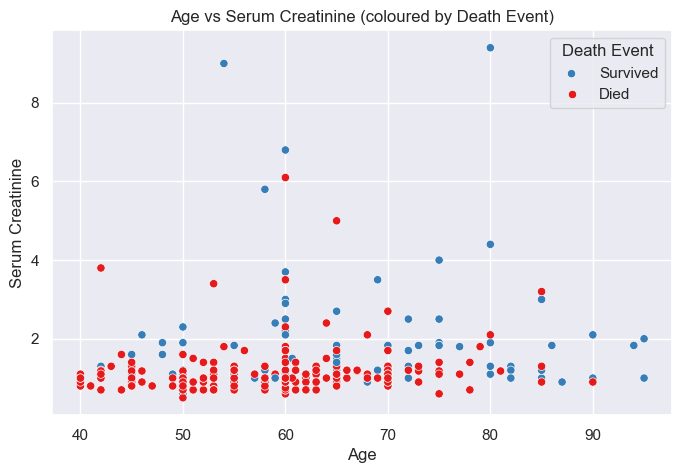

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='serum_creatinine', hue='DEATH_EVENT', data=df, palette='Set1')
plt.title("Age vs Serum Creatinine (coloured by Death Event)")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine")
plt.legend(title='Death Event', labels=['Survived', 'Died'])
plt.show()

### Correlation Matrix

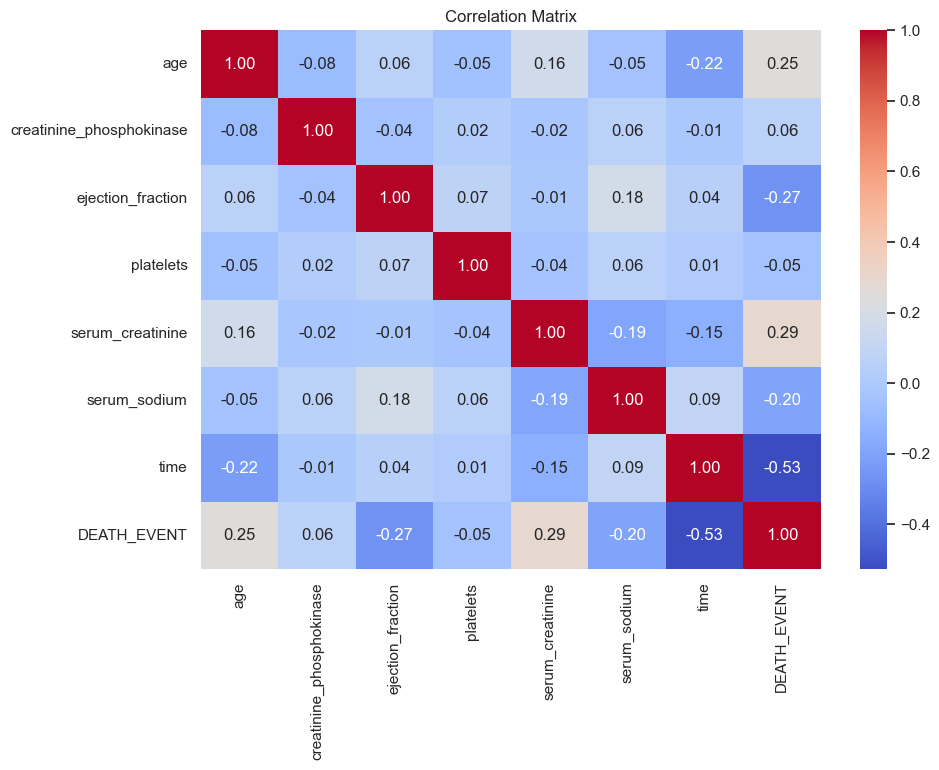

In [15]:
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']

plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship
- `serum_creatinine` and `time` show the strongest correlations with `DEATH_EVENT`

## Follow-up Time Analysis
### Death Event Distribution by Follow-up Time Bins

C:\Users\TheGreatZiz\AppData\Local\Temp\ipykernel_11396\671063378.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_death = df.groupby('time_bin')['DEATH_EVENT'].mean()


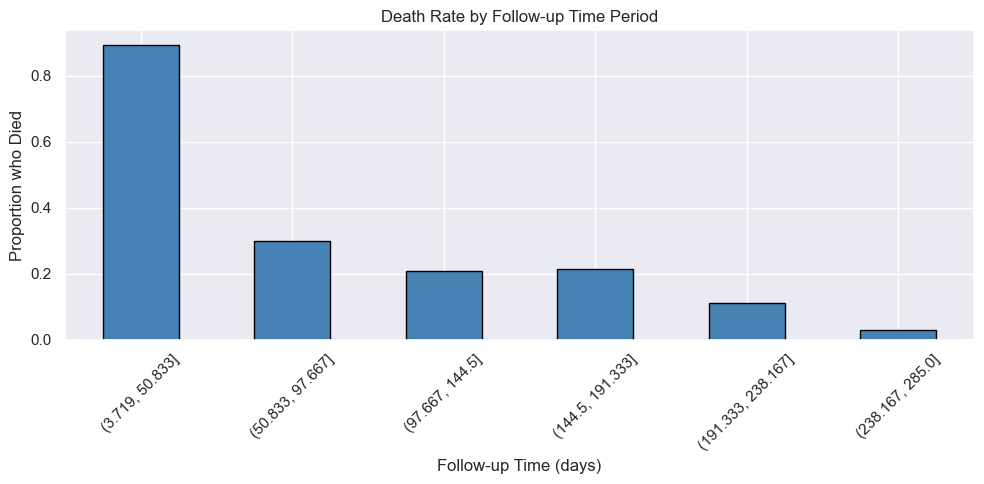

In [16]:
# Bin the follow-up time into periods
df['time_bin'] = pd.cut(df['time'], bins=6)

time_death = df.groupby('time_bin')['DEATH_EVENT'].mean()

plt.figure(figsize=(10,5))
time_death.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Death Rate by Follow-up Time Period")
plt.ylabel("Proportion who Died")
plt.xlabel("Follow-up Time (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.